# 背景

在银行业务中，信用卡客户流失是一个重要的挑战.客户流失对银行业务造成负面影响，不仅意味着失去潜在的收入来源，还可能增加客户获取和留存的成本.如果能够预测哪些客户即将流失,并主动向这些客户提供更好的服务,能够挽回这些即将流失的客户.

# 数据字段
| 字段名称 | 字段描述 |
| ---- | ---- |
| CLIENTNUM | 客户编号。客户持有账户的唯一标识符。 |
| Attrition_Flag | 内部事件（客户活动）变量 - 如果账户关闭则为1，否则为0。 |
| Gender | 人口统计变量 - M=男性，F=女性。 |
| Dependent_count	| 人口统计变量 - 受抚养人数。 |
| Education_Level	| 人口统计变量 - 账户持有者的教育程度（例如：高中、大学毕业等）。 |
| Marital_Status	| 人口统计变量 - 婚姻状况（已婚、单身、离异、未知）。 |
| Income_Category	| 人口统计变量 - 账户持有者的年收入类别（< $40K、$40K - 60K、$60K - $80K、$80K - $120K、> $120K、未知）。 |
| Card_Category	| 产品变量 - 卡片类型（蓝色、银色、金色、白金）。 |
| Months_on_book	| 与银行建立关系的时间（以月为单位）。 |
| Total_Relationship_Count	| 客户持有的产品总数。 |
| Months_Inactive_12_mon	| 过去12个月内不活跃的月份数。 |
| Contacts_Count_12_mon	| 过去12个月内的联系次数。 |
| Credit_Limit	| 信用卡的信用额度。 |
| Total_Revolving_Bal	| 信用卡的总循环余额。 |
| Avg_Open_To_Buy	| 可用信用额度（过去12个月的平均值）。 |
| Total_Amt_Chng_Q4_Q1	| 交易金额变化（Q4相对于Q1）。 |
| Total_Trans_Amt	| 总交易金额（过去12个月）。 |
| Total_Trans_Ct	| 总交易次数（过去12个月）。 |
| Total_Ct_Chng_Q4_Q1	| 交易次数变化（Q4相对于Q1）。 |
| Avg_Utilization_Ratio	| 平均卡片使用率。 |
| Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 | 	Naive Bayes分类器输出，不属于字段描述信息。 |
| Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 | 	Naive Bayes分类器输出，不属于字段描述信息。 |


# 任务要求
任务1：采用 Pyhton 语言对数据集进行数据预处理，具体包括缺失值检测与处理，数据特征描述，数据样例数据查看，5数查看(最大值、最小值等)

In [85]:
import pandas as pd

data = pd.read_csv('BankChurners.csv')
#data.head(10)
# 数据特征描述
data.info()
# 查看数据概况(5数查看)
data.describe()
# 缺失值检查
data.isna().describe()
# 重复值检查
data['CLIENTNUM'].duplicated().describe()
# 去除不必要的字段
data = data.drop(columns=['Dependent_count', 'Card_Category'
                          , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
                          , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
# 样例数据查看
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,Graduate,Married,$40K - $60K,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,Unknown,Married,$120K +,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,High School,Unknown,$60K - $80K,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,Uneducated,Single,$60K - $80K,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,Graduate,Single,$80K - $120K,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


任务2：探索年龄分布情况

Customer_Age
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: count, dtype: int64


<Axes: ylabel='CLIENTNUM'>

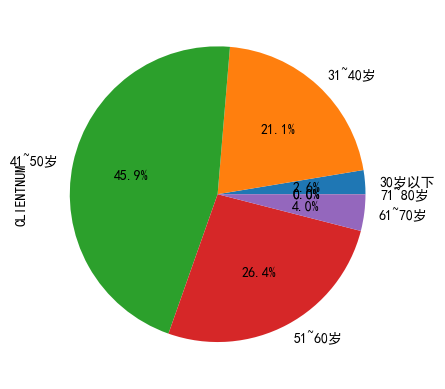

In [80]:
print(data['Customer_Age'].value_counts())

# 由任务1得知，年龄最大为73，最低为26
# 设置年龄层
bins = [0, 30, 40, 50, 60, 70, 80, 100]
# 设置labels
labels = ['30岁以下', '31~40岁', '41~50岁', '51~60岁', '61~70岁', '71~80岁', '80岁以上']

data['年龄分层'] = pd.cut(data['Customer_Age'],bins, labels = labels)

data_age = data.groupby('年龄分层')['CLIENTNUM'].count()/data.groupby('年龄分层')['CLIENTNUM'].count().sum()
# 通过绘制直方图可知，41~50岁年龄的占比是最大的，超过40%
data_age.plot(kind = 'pie', autopct='%1.1f%%')

任务3:  探索客户受教育水平

Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: CLIENTNUM, dtype: int64


<Axes: ylabel='CLIENTNUM'>

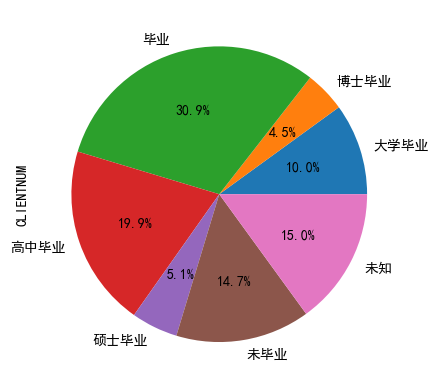

In [81]:
# 查看教育水平的概况
data_edu = data.groupby('Education_Level')['CLIENTNUM'].count()
print(data_edu)
# 由数据可以看出，疑问点：如何处理“未知”的数据？
labels = ['大学毕业', '博士毕业', '毕业', '高中毕业', '硕士毕业', '未毕业', '未知']
data_edu.plot(kind='pie', labels = labels, autopct='%1.1f%%')

任务4:  婚姻状况探索

Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
Name: CLIENTNUM, dtype: int64


<Axes: ylabel='CLIENTNUM'>

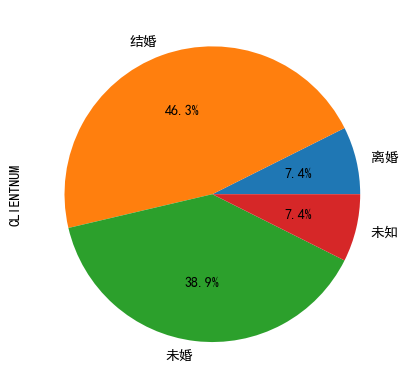

In [82]:
# 查看婚姻状况
data_marital = data.groupby('Marital_Status')['CLIENTNUM'].count()
print(data_marital)
labels = ['离婚', '结婚', '未婚', '未知']
data_marital.plot(kind='pie', labels = labels, autopct='%1.1f%%')


任务5:  完成特征选择

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
           信用卡客户是否流失  流失数量
0  Existing Customer  8500
1  Attrited Customer  1627


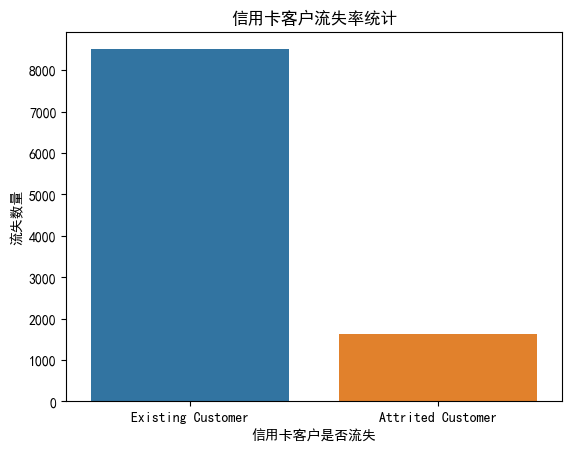

In [83]:
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文防止乱码
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

# 查看未流失和流失客户的数量
series_attrition = data['Attrition_Flag'].value_counts()
data_attrition = pd.DataFrame({'信用卡客户是否流失': series_attrition.index, '流失数量': series_attrition.values})
print(data_attrition)
plt.title('信用卡客户流失率统计')
sns.set_color_codes("pastel")
sns.barplot(x = '信用卡客户是否流失', y="流失数量", data=data_attrition)
plt.xticks()

# 特征处理
# 中文处理
# 教育情况
Education_Level_dict = {'College':1, 'Doctorate':2, 'Graduate':3, 'High School':4, 'Post-Graduate':5, 'Uneducated':6, 'Unknown':9}
data['Education_Level'] = data['Education_Level'].map(Education_Level_dict)
# 婚姻状况
Marital_Status_dict = {'Divorced':1, 'Married':2, 'Single':3, 'Unknown':9}
data['Marital_Status'] = data['Marital_Status'].map(Marital_Status_dict)
# 信用卡客户流失
attrition_flag_transform_dict = {'Existing Customer': 0 , 'Attrited Customer':1}
data['Attrition_Flag'] = data['Attrition_Flag'].map(attrition_flag_transform_dict)
# 性别
data['Gender'] = data['Gender'].map({'M':1, 'F':2})
# 收入类别
Income_Category_dict = {'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5, 'Unknown':9}
data['Income_Category'] = data['Income_Category'].map(Income_Category_dict)

# 特征选择
# 目标值
target = data['Attrition_Flag'].values
# #特征值
columns = data.columns.to_list()
columns.remove('年龄分层')
columns.remove('Attrition_Flag')
features = data[columns].values
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)


任务6:  基于决策树建模

In [84]:
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):    
    response = {}    
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)    
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)    
    print("GridSearch最优参数：", search.best_params_)    
    print("GridSearch最优分数： %0.4lf" %search.best_score_)  
    predict_y = gridsearch.predict(test_x)    
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))    
    response['predict_y'] = predict_y    
    response['accuracy_score'] = accuracy_score(test_y,predict_y)    
    return response

model = RandomForestClassifier(random_state = 1, criterion = 'gini')
model_name = 'randomforestclassifier'
model_param_grid = {'randomforestclassifier__n_estimators':[3,5,6]}

pipeline = Pipeline([('scaler', StandardScaler()), (model_name, model)])
result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch最优参数： {'randomforestclassifier__n_estimators': 5}
GridSearch最优分数： 0.9416
准确率 0.9503
